In [2]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # MSE

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/reg.csv', index_col = [0])
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Price
0,0.034633,0.206919,0.137057,0.540526,0.193941,0.699239,0.630532,0.239410,0.027375,0.209857,0.347609,0.996394,0.102644,0.422222
1,0.028920,0.014315,0.276113,0.255945,0.618886,0.555407,0.782263,0.482977,0.103031,0.106690,0.520776,0.996650,0.187120,0.368889
2,0.020627,0.033230,0.281116,0.525591,0.165269,0.624102,0.586005,0.272713,0.036010,0.106986,0.595301,0.983284,0.084079,0.660000
3,0.022749,0.033801,0.125044,0.263253,0.251509,0.658532,0.432160,0.344932,0.150018,0.068317,0.651297,0.989989,0.015990,0.631111
4,0.022148,0.029374,0.121057,0.521126,0.399670,0.448086,0.520158,0.495342,0.104383,0.069360,0.560116,0.998723,0.092782,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.028702,0.019528,0.455716,0.097575,0.576859,0.588769,0.654701,0.188444,0.007595,0.165409,0.736795,0.982923,0.219891,0.386667
502,0.034217,0.009498,0.490485,0.372934,0.532351,0.580505,0.750547,0.143776,0.051186,0.166428,0.867950,0.995114,0.207453,0.346667
503,0.035352,0.021495,0.423918,0.397988,0.349407,0.610529,0.907637,0.087385,0.083448,0.164870,0.782704,0.995791,0.094044,0.420000
504,0.026182,0.028603,0.443442,0.509663,0.229142,0.667841,0.867135,0.236241,0.016177,0.167554,0.749186,0.986855,0.107399,0.377778


In [4]:
print(df['Price'].to_numpy())

[0.42222222 0.36888889 0.66       0.63111111 0.69333333 0.52666667
 0.39777778 0.49111111 0.25555556 0.30888889 0.22222222 0.30888889
 0.37111111 0.34222222 0.29333333 0.33111111 0.40222222 0.27777778
 0.33777778 0.29333333 0.19111111 0.32444444 0.22666667 0.21111111
 0.23555556 0.19777778 0.25777778 0.21777778 0.29777778 0.35555556
 0.17111111 0.21111111 0.18222222 0.18       0.18888889 0.30888889
 0.33333333 0.35555556 0.43777778 0.57333333 0.66444444 0.48
 0.45111111 0.43777778 0.36       0.31777778 0.33333333 0.25777778
 0.20888889 0.32       0.32666667 0.34444444 0.44444444 0.40888889
 0.30888889 0.67555556 0.43777778 0.59111111 0.40666667 0.32444444
 0.30444444 0.24444444 0.38222222 0.44444444 0.62222222 0.41111111
 0.32       0.37777778 0.27555556 0.35333333 0.42666667 0.37111111
 0.39555556 0.40888889 0.42444444 0.36444444 0.33333333 0.35111111
 0.36       0.34       0.51111111 0.42       0.44       0.39777778
 0.42       0.48       0.38888889 0.38222222 0.41333333 0.52666667
 

In [5]:
print(df['Price'].to_numpy().reshape((-1, 1)))

[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]
 [0.52666667]
 [0.39777778]
 [0.49111111]
 [0.25555556]
 [0.30888889]
 [0.22222222]
 [0.30888889]
 [0.37111111]
 [0.34222222]
 [0.29333333]
 [0.33111111]
 [0.40222222]
 [0.27777778]
 [0.33777778]
 [0.29333333]
 [0.19111111]
 [0.32444444]
 [0.22666667]
 [0.21111111]
 [0.23555556]
 [0.19777778]
 [0.25777778]
 [0.21777778]
 [0.29777778]
 [0.35555556]
 [0.17111111]
 [0.21111111]
 [0.18222222]
 [0.18      ]
 [0.18888889]
 [0.30888889]
 [0.33333333]
 [0.35555556]
 [0.43777778]
 [0.57333333]
 [0.66444444]
 [0.48      ]
 [0.45111111]
 [0.43777778]
 [0.36      ]
 [0.31777778]
 [0.33333333]
 [0.25777778]
 [0.20888889]
 [0.32      ]
 [0.32666667]
 [0.34444444]
 [0.44444444]
 [0.40888889]
 [0.30888889]
 [0.67555556]
 [0.43777778]
 [0.59111111]
 [0.40666667]
 [0.32444444]
 [0.30444444]
 [0.24444444]
 [0.38222222]
 [0.44444444]
 [0.62222222]
 [0.41111111]
 [0.32      ]
 [0.37777778]
 [0.27555556]
 [0.35333333]
 [0.42666667]
 [0.37

In [6]:
X = df.drop('Price', axis=1).to_numpy()
y = df['Price'].to_numpy().reshape((-1, 1)) # 열벡터로 바꾸기

In [11]:
X.shape

(506, 13)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [9]:
# Create Data Loader
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

trainsets = TensorData(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size = 32, shuffle = True)
testsets = TensorData(X_test, y_test)
testloader = torch.utils.data.DataLoader(testsets, batch_size = 32, shuffle = False)

In [12]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 50, bias = True)
        self.fc2 = nn.Linear(50, 30, bias = True)
        self.fc3 = nn.Linear(30, 1, bias = True)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        return x

In [13]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-7)

In [14]:
loss_ = []
n = len(trainloader)
for epoch in range(401):
    running_loss = 0.0
    for data in trainloader:
        inputs, values = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, values)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_.append(running_loss / n)

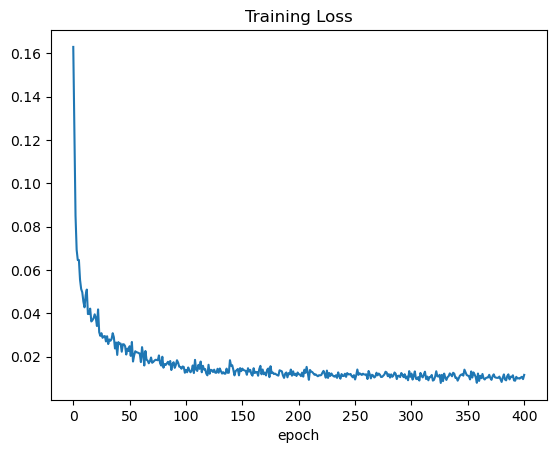

In [15]:
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

In [16]:
def evaluation(dataloader):
    predictions = torch.tensor([], dtype=torch.float)
    actual = torch.tensor([], dtype=torch.float)
    with torch.no_grad():
        model.eval()
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)
            predictions = torch.cat((predictions, outputs), 0)
            actual = torch.cat((actual, values), 0)

    predictions = predictions.numpy()
    actual = actual.numpy()
    rmse = np.sqrt(mean_squared_error(predictions, actual))

    return rmse

In [17]:
train_rmse = evaluation(trainloader)
test_rmse = evaluation(testloader)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.07548646628856659
Test RMSE: 0.10790663212537766
